In [1]:
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy as np
#数据集函数
def get_data():
    data = load_svmlight_file("a9a",n_features=124)
    return data[0], data[1]

def get_t_data():
    data = load_svmlight_file("a9a.t",n_features=124)
    return data[0], data[1]

#函数h(X)
def h(W,x):
    return 1/(1+np.e**(-x*W.T))

#损失函数
def loss(W,x,y,n):
    return -1/n*sum(y*np.log(h(W,x))+(np.ones(n)-y)*np.log(np.ones(n)-h(W,x)))

#梯度函数
def g(W,x,y,n):
    return 1/n*(h(W,x)-y)*x

#分类精确度
def accy(W,x,y,n):
    res=(h(W,x)-0.5)*(y-0.5)
    return np.array((res[res>0].shape))/n

#取数据集
X_train, y_train = get_data()
X_test, y_test = get_t_data()

#添加一列属性值为1，此列权重即b
X_train[:,123]=1
X_test[:,123]=1

#更改y格式以适应损失函数
y_train=(y_train+1)/2
y_test=(y_test+1)/2
1

C:\Users\usee\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


1

In [2]:
#获取训练与验证样本个数及自变量维度
ntr,D=np.array(X_train.shape)
nte=np.array(y_test.shape)[0]

#设置训练样本随机序列
rand_squence=np.arange(0,ntr)
np.random.shuffle(rand_squence) 
2

2

SGD final loss:0.326419
NAG final loss:0.360658
RMSProp final loss:0.324955
AdaDelta final loss:0.327011
ADAM final loss:0.328736


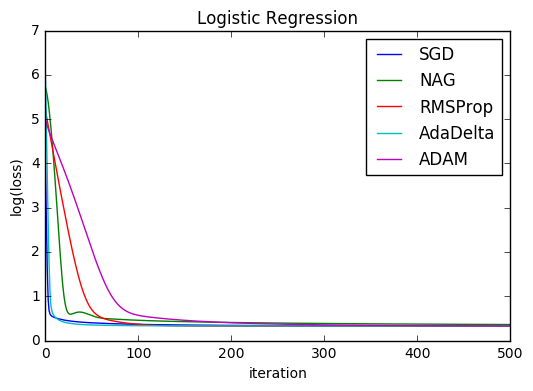

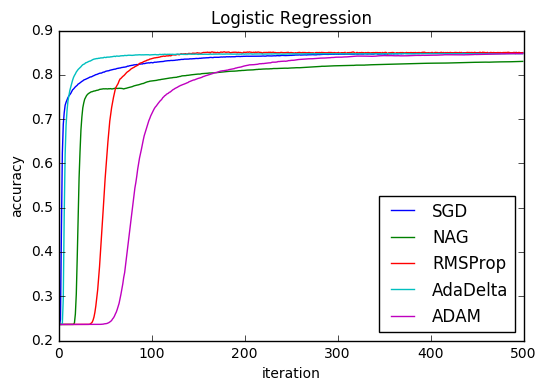

In [3]:
#初始化参数
W=np.random.rand(D)
v_NAG=0
W_NAG=np.random.rand(D)
a_RMSProp=0.9
W_RMSProp=np.random.rand(D)
a_AdaDelta=0.9
W_AdaDelta=np.random.rand(D)
b_ADAM=0.9
a_ADAM=0.99
W_ADAM=np.random.rand(D)
#迭代周期
it=50
#样本分块数
nb=10
#初始化损失函数大小
L=np.zeros(it*nb)
L0=np.zeros(it*nb)
L0_NAG=np.zeros(it*nb)
L0_RMSProp=np.zeros(it*nb)
L0_AdaDelta=np.zeros(it*nb)
L0_ADAM=np.zeros(it*nb)
#初始化精确率矩阵
ac=np.zeros(it*nb)
ac0=np.zeros(it*nb)
ac0_NAG=np.zeros(it*nb)
ac0_RMSProp=np.zeros(it*nb)
ac0_AdaDelta=np.zeros(it*nb)
ac0_ADAM=np.zeros(it*nb)
#外循环为整个样本集迭代
for i in range(it):
    #每次重新排序样本集
    np.random.shuffle(rand_squence) 
    #内循环为样本集内的块迭代
    for j in range(nb):
        branch=int(100/nb)
        step=int(branch*ntr.tolist()/100)
        s=rand_squence[range(int(j*step),int((j+1)*step))]
        L[i*nb+j]=loss(W,X_train[s,],y_train[s],step)
        #计算训练集分类精确度
        ac[i*nb+j]=accy(W,X_train[s,],y_train[s],step)
        
        #更新随机梯度权值
        W=W-1e-3*g(W,X_train[s,],y_train[s],branch)
        
        #更新NAG权值
        v_NAG=0.9*v_NAG+0.01*g(W_NAG-0.9*v_NAG,X_train[s,],y_train[s],step)
        W_NAG=W_NAG-v_NAG
        
        #更新RMSProp权值
        g_RMSProp=g(W_RMSProp,X_train[s,],y_train[s],branch)
        if((i,j)==(0,0)):q_RMSProp=g_RMSProp**2
        else:q_RMSProp=a_RMSProp*q_RMSProp+(1-a_RMSProp)*(g_RMSProp**2)
        W_RMSProp=W_RMSProp-0.01/(q_RMSProp**0.5+1e-7)*g_RMSProp
        
        #更新AdaDelta权值
        g_AdaDelta=g(W_AdaDelta,X_train[s,],y_train[s],branch)
        if((i,j)==(0,0)):
            n_AdaDelta=g_AdaDelta**2
            delta=0.01
        else:
            n_AdaDelta=a_AdaDelta*n_AdaDelta+(1-a_AdaDelta)*g_AdaDelta**2
        th_AdaDelta=-delta**0.5/(n_AdaDelta**0.5+1e-7)*g_AdaDelta
        W_AdaDelta=W_AdaDelta+th_AdaDelta
        delta=a_AdaDelta*delta+(1-a_AdaDelta)*th_AdaDelta**2
        
        #更新ADAM权值
        g_ADAM=g(W_ADAM,X_train[s,],y_train[s],branch)
        if((i,j)==(0,0)):
            m_ADAM=g_ADAM
            v_ADAM=g_ADAM**2
        else:
            m_ADAM=b_ADAM*m_ADAM+(1-b_ADAM)*g_ADAM
            v_ADAM=a_ADAM*v_ADAM+(1-a_ADAM)*(g_ADAM**2)
        mb_ADAM=0.01*(1-a_ADAM**(i*nb+j+1))**0.5/(1-b_ADAM**(i*nb+j+1))
        W_ADAM=W_ADAM-mb_ADAM*m_ADAM/(v_ADAM+1e-7)**0.5
        
        #计算验证集loss
        L0[i*nb+j]=loss(W,X_test,y_test,nte)
        L0_NAG[i*nb+j]=loss(W_NAG,X_test,y_test,nte)
        L0_RMSProp[i*nb+j]=loss(W_RMSProp,X_test,y_test,nte)
        L0_AdaDelta[i*nb+j]=loss(W_AdaDelta,X_test,y_test,nte)
        L0_ADAM[i*nb+j]=loss(W_ADAM,X_test,y_test,nte)
        #计算验证集分类精确度
        ac0[i*nb+j]=accy(W,X_test,y_test,nte)
        ac0_NAG[i*nb+j]=accy(W_NAG,X_test,y_test,nte)
        ac0_RMSProp[i*nb+j]=accy(W_RMSProp,X_test,y_test,nte)
        ac0_AdaDelta[i*nb+j]=accy(W_AdaDelta,X_test,y_test,nte)
        ac0_ADAM[i*nb+j]=accy(W_ADAM,X_test,y_test,nte)
#输出最终loss值
print("SGD final loss:%f"%L0[-1])
print("NAG final loss:%f"%L0_NAG[-1])
print("RMSProp final loss:%f"%L0_RMSProp[-1])
print("AdaDelta final loss:%f"%L0_AdaDelta[-1])
print("ADAM final loss:%f"%L0_ADAM[-1])
#画出loss的对数随迭代次数的变化
plt.figure(1)
plt.plot(L0,label='SGD')
plt.plot(L0_NAG,label='NAG')
plt.plot(L0_RMSProp,label='RMSProp')
plt.plot(L0_AdaDelta,label='AdaDelta')
plt.plot(L0_ADAM,label='ADAM')
plt.ylabel('log(loss)')
plt.xlabel('iteration')
plt.title('Logistic Regression')
plt.legend()
plt.show()
plt.figure(2)
#画出精确度随迭代次数的变化
plt.plot(ac0,label='SGD')
plt.plot(ac0_NAG,label='NAG')
plt.plot(ac0_RMSProp,label='RMSProp')
plt.plot(ac0_AdaDelta,label='AdaDelta')
plt.plot(ac0_ADAM,label='ADAM')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.title('Logistic Regression')
plt.legend(loc='lower right')
plt.show()